# Julia Jupyter Notebooks PyPlot External Graphics Properties

This document demonstrates the behavior of Julia Jupyter notebooks using the PyPlot module and external window rendering

In [1]:
using Printf
using PyCall
pygui(:qt5)
using PyPlot
py_sys = pyimport("sys")
py_numpy = pyimport("numpy")
py_scipy = pyimport("scipy")
py_matplotlib = pyimport("matplotlib");

In [2]:
python_version = py_sys.version_info
python_executable = py_sys.executable
python_exec_prefix = py_sys.exec_prefix
numpy_version = py_numpy.version.full_version
scipy_version = py_scipy.version.full_version
matplotlib_version = py_matplotlib.__version__
matplotlib_config_file = py_matplotlib.matplotlib_fname()
matplotlib_config_dir = py_matplotlib.get_configdir()
matplotlib_data_path = py_matplotlib.get_data_path()
@printf("Python version: %d.%d.%d %s-%d\n", python_version[1], python_version[2], python_version[3], python_version[4], python_version[5])
println("Python executable: ", python_executable)
println("Python exec_prefix: ", python_exec_prefix)
println("Numpy version: ", numpy_version)
py_numpy.show_config()
println("Scipy version: ", scipy_version)
println("Matplotlib version: ", matplotlib_version)
println("Matplotlib config file: ", matplotlib_config_file)
println("Matplotlib config directory: ", matplotlib_config_dir)
println("Matplotlib data path: ", matplotlib_data_path)
println("The default figure DPI is ", matplotlib.rcParams["figure.dpi"])
println("The default figure size is ", matplotlib.rcParams["figure.figsize"])
println("The default font size is ", matplotlib.rcParams["font.size"])

Python version: 3.9.10 final-0
Python executable: C:\Users\rick\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
Python exec_prefix: C:\Users\rick\.julia\conda\3
Numpy version: 1.22.4
Scipy version: 1.8.1
Matplotlib version: 3.5.2
Matplotlib config file: C:\Users\rick\.matplotlib\matplotlibrc
Matplotlib config directory: C:\Users\rick\.matplotlib
Matplotlib data path: C:\Users\rick\.julia\conda\3\lib\site-packages\matplotlib\mpl-data
The default figure DPI is 187.0
The default figure size is [9.0, 4.5]
The default font size is 10.0


In [3]:
println(matplotlib.get_backend())
#'TKAgg','GTKAgg','Qt4Agg','WXAgg'
# Do not switch the backend using pyplot, it will cause the julia kernel to crash
# matplotlib.pyplot.switch_backend("Qt4Agg")
# println(matplotlib.get_backend())

agg


In [4]:
ax_text_font_size = 8
text_lines = @sprintf("Python version: %d.%d.%d %s-%d\nNumpy version: %s\nScipy version: %s\nMatlplotlib version: %s\nDefault font size: %0.1f\nThis text font size: %0.1f", 
    python_version[1], 
    python_version[2], 
    python_version[3], 
    python_version[4], 
    python_version[5], 
    numpy_version, 
    scipy_version, 
    matplotlib_version,
    matplotlib.rcParams["font.size"],
    ax_text_font_size);
# python_executable = py_sys.executable
# python_exec_prefix = py_sys.exec_prefix
# matplotlib_config_file = py_matplotlib.matplotlib_fname()
# matplotlib_config_dir = py_matplotlib.get_configdir()
# matplotlib_data_path = py_matplotlib.get_data_path())

"Python version: 3.9.10 final-0\nNumpy version: 1.22.4\nScipy version: 1.8.1\nMatlplotlib version: 3.5.2\nDefault font size: 10.0\nThis text font size: 8.0"

The cell below will draw a figure in a new window

In [5]:
title_str = @sprintf("Default DPI: %0.3f", matplotlib.rcParams["figure.dpi"])
f = figure(figsize=(6, 4), edgecolor="black", facecolor="gray")
plt.plot(range(1, 10, length=10), "o-", label="legend")
xlabel("X label")
ylabel("Y Label")
title(title_str)
legend()
ax = plt.gca()
ax.text(6, 2, text_lines, horizontalalignment="left", verticalalignment="bottom", fontsize=ax_text_font_size)
plt.grid(true)

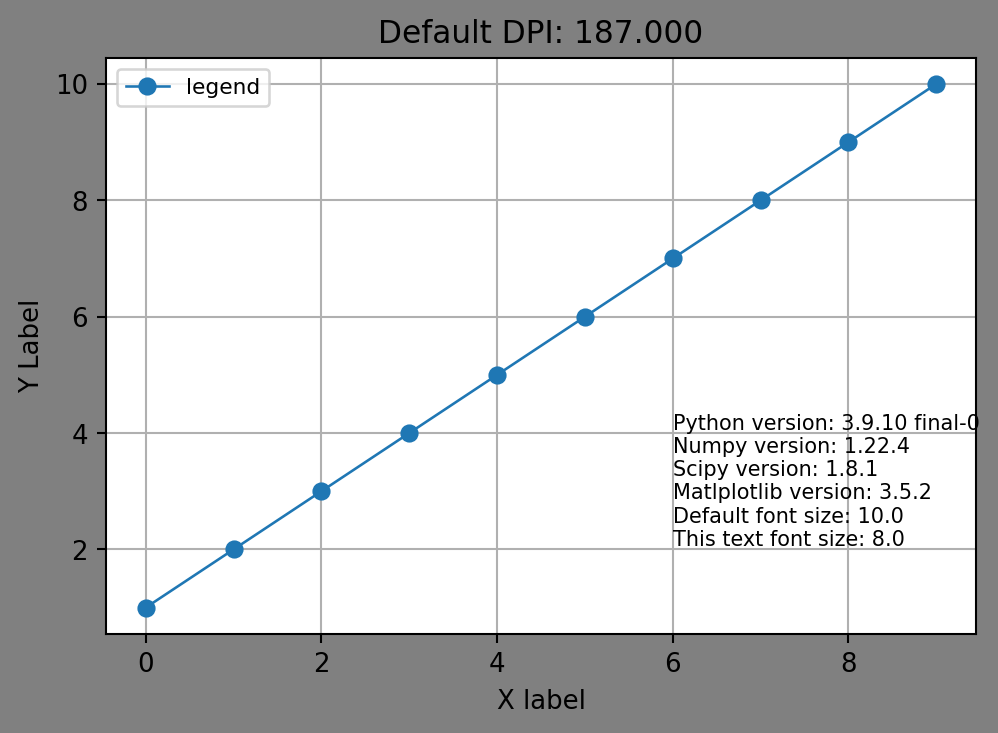

In [6]:
# This seems to be needed when using the Julia VS Code extension kernel
display(plt.gcf())

In [ ]:
# set pygui to true after loading PyPlot to get external interactive windows
pygui(true);

Using the default figure.dpi of 187 generates an 12.1" figure for a 6x4"" figure, on my 24" monitors within VS Code.  Thus to get an accurate figure size run the following 

In [ ]:
real_dpi = 187 / 12.1 * 6
PyCall.PyDict(matplotlib["rcParams"])["figure.dpi"] = [real_dpi]

In [ ]:
real_dpi = 187 / 12.1  * 6
title_str = @sprintf("Real DPI: %0.3f", real_dpi)
PyCall.PyDict(matplotlib["rcParams"])["figure.dpi"] = [real_dpi]
f = figure(figsize=(6, 4), edgecolor="black", facecolor="gray")
plt.plot(range(1, 10, length=10), "o-", label="legend")
xlabel("X label")
ylabel("Y Label")
title(title_str)
legend()
ax = plt.gca()
ax.text(6, 2, text_lines, horizontalalignment="left", verticalalignment="bottom", fontsize=ax_text_font_size)
plt.grid(true)
fig_filename = @sprintf("External 6x4 %0.3f DPI figure.png", real_dpi)
savefig(fig_filename)

As can be seen in the saved image, the total number of pixels is small and the fonts are not rendered well.  If we up the resolution to a publication level of 300 DPI we get

In [ ]:
pub_dpi = 300
title_str = @sprintf("Publication DPI: %0.1f", pub_dpi)
PyCall.PyDict(matplotlib["rcParams"])["figure.dpi"] = [pub_dpi]
f = figure(figsize=(6, 4), edgecolor="black", facecolor="gray")
plt.plot(range(1, 10, length=10), "o-", label="legend")
xlabel("X label")
ylabel("Y Label")
title(title_str)
legend()
ax = plt.gca()
ax.text(6, 2, text_lines, horizontalalignment="left", verticalalignment="bottom", fontsize=ax_text_font_size)
plt.grid(true)
fig_filename = @sprintf("External 6x4 %0.3f DPI figure.png", pub_dpi)
savefig(fig_filename)

in this case the fonts are much clearer.